# Naïve Bayes e distribuições
## Bernoulli

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('CSVs/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
occupation = pd.get_dummies(df['occupation'], drop_first=True)
marital = pd.get_dummies(df['marital-status'], drop_first=True)
workclass = pd.get_dummies(df['workclass'], drop_first=True)
education = pd.get_dummies(df['education'], drop_first=True)
race = pd.get_dummies(df['race'], drop_first=True)
sex = pd.get_dummies(df['sex'], drop_first=True)
country = pd.get_dummies(df['native-country'], drop_first=True)
relationship = pd.get_dummies(df['relationship'], drop_first=True)

df_dummies = df[['income']].merge(occupation, how='left', left_index=True, right_index=True)

df_dummies = df_dummies.merge(marital, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(workclass, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(education, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(race, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(sex, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(country, how='left', left_index=True, right_index=True)
df_dummies = df_dummies.merge(relationship, how='left', left_index=True, right_index=True)
df_dummies.head()

In [44]:
X = df['sex'].values
X

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [45]:
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(X)
X, np.unique(X)

(array([1, 1, 1, ..., 0, 1, 0]), array([0, 1]))

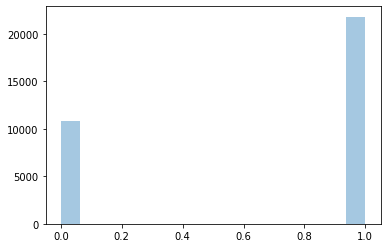

In [46]:
sns.distplot(X, kde=False);

In [47]:
X.shape

(32561,)

In [50]:
X = X.reshape(-1, 1)
X.shape

(32561, 1)

In [51]:
y = df_dummies['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [52]:
ber_nb = BernoulliNB()
ber_nb.fit(X, y)

BernoulliNB()

In [53]:
pred = ber_nb.predict(X)

In [54]:
pred, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [55]:
accuracy_score(y, pred)

0.7591904425539756

In [56]:
X = df_dummies.iloc[:,1:].values
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [57]:
ber_nb = BernoulliNB()
ber_nb.fit(X, y)
accuracy_score(y, ber_nb.predict(X))

0.7696323822978409

## Multinomial

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
lb_encoder0 = LabelEncoder()
lb_encoder1 = LabelEncoder()
lb_encoder2 = LabelEncoder()
lb_encoder3 = LabelEncoder()
lb_encoder4 = LabelEncoder()
lb_encoder5 = LabelEncoder()
lb_encoder6 = LabelEncoder()

In [61]:
df['workclass'] = lb_encoder0.fit_transform(df['workclass'])
df['education'] = lb_encoder1.fit_transform(df['education'])
df['marital-status'] = lb_encoder2.fit_transform(df['marital-status'])
df['occupation'] = lb_encoder3.fit_transform(df['occupation'])
df['relationship'] = lb_encoder4.fit_transform(df['relationship'])
df['race'] = lb_encoder5.fit_transform(df['race'])
df['native-country'] = lb_encoder6.fit_transform(df['native-country'])
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [65]:
X = df.iloc[:, [1,3,5,6,7,8,13]].values
X

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]])

In [68]:
y = df['income'].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [69]:
mult_nb = MultinomialNB()
mult_nb.fit(X, y)

MultinomialNB()

In [70]:
pred = mult_nb.predict(X)

In [72]:
pred, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [73]:
accuracy_score(y, pred)

0.7485949448727005